In [1]:
#pip install -r requirements.txt

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from IPython.display import display, HTML

In [2]:
##################################__DATA LOAD__################################################

In [3]:
interest_rate = pd.read_csv('./data/interest_rate.csv')
oil_price = pd.read_csv('./data/oil_price.csv')
#cpi = pd.read_csv('./data/cpi.csv')
inflation = pd.read_csv('./data/inflation.csv')

In [4]:
##################################__DATA SANITY CHECKS__################################################

In [5]:
interest_rate.head(1000)

,location,interest_rate,year,month
0,AUS,5.00,2000,1
1,AUS,5.48,2000,2
2,AUS,5.50,2000,3
3,AUS,5.72,2000,4
4,AUS,5.98,2000,5
...,...,...,...,...
995,USA,0.09,2014,9
996,USA,0.09,2014,10
997,USA,0.09,2014,11
998,USA,0.12,2014,12


In [6]:
#cpi.head(2000)

In [7]:
oil_price.head(1000)

,oil_price,year,month,location,oil_price_lag_1m,oil_price_lag_2m,oil_price_lag_3m,oil_price_lag_4m,oil_price_lag_5m,oil_price_lag_6m
0,27.501304,2003,7,AUS,26.778571,25.629545,25.239048,29.440000,31.643500,30.336364
1,28.694286,2003,8,AUS,27.501304,26.778571,25.629545,25.239048,29.440000,31.643500
2,26.150909,2003,9,AUS,28.694286,27.501304,26.778571,25.629545,25.239048,29.440000
3,28.349130,2003,10,AUS,26.150909,28.694286,27.501304,26.778571,25.629545,25.239048
4,28.482500,2003,11,AUS,28.349130,26.150909,28.694286,27.501304,26.778571,25.629545
...,...,...,...,...,...,...,...,...,...,...
970,18.965000,1993,3,EU,18.960000,18.700000,18.045000,16.705000,16.900000,16.520000
971,18.410000,1993,2,EU,18.965000,18.960000,18.700000,18.045000,16.705000,16.900000
972,17.755000,1993,1,EU,18.410000,18.965000,18.960000,18.700000,18.045000,16.705000
973,18.290000,1992,12,EU,17.755000,18.410000,18.965000,18.960000,18.700000,18.045000


In [29]:
#merge all separate data into one dataframe

df = interest_rate.merge(oil_price, on=['location', 'year', 'month'], suffixes=('', '_delme'))
#df = df.merge(cpi, on=['location', 'year', 'month'], suffixes=('', '_delme'))
df = df.merge(inflation, on=['location', 'year', 'month'], suffixes=('', '_delme'))
df = df[[c for c in df.columns if not c.endswith('_delme')]]


df.to_csv('./data/final.csv', index=False)

In [9]:
df.head(3000)

,location,interest_rate,year,month,oil_price,oil_price_lag_1m,oil_price_lag_2m,oil_price_lag_3m,oil_price_lag_4m,oil_price_lag_5m,oil_price_lag_6m,inflation,inflation_lag_6m
0,AUS,4.75,2003,9,26.150909,28.694286,27.501304,26.778571,25.629545,25.239048,29.440000,2.6,3.2
1,AUS,5.23,2003,12,29.569524,28.482500,28.349130,26.150909,28.694286,27.501304,26.778571,2.5,2.9
2,AUS,5.25,2004,3,32.226522,29.628500,30.264762,29.569524,28.482500,28.349130,26.150909,2.0,3.3
3,AUS,5.25,2004,6,34.490455,36.365714,32.263810,32.226522,29.628500,30.264762,29.569524,2.5,2.6
4,AUS,5.25,2004,9,40.212727,40.419091,36.306818,34.490455,36.365714,32.263810,32.226522,2.3,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,USA,0.77,2022,5,109.550000,101.780000,108.500000,91.640000,83.220000,71.710000,79.150000,8.6,5.0
615,USA,1.21,2022,6,114.840000,109.550000,101.780000,108.500000,91.640000,83.220000,71.710000,9.1,5.4
616,USA,1.68,2022,7,101.620000,114.840000,109.550000,101.780000,108.500000,91.640000,83.220000,8.5,5.4
617,USA,2.33,2022,8,93.670000,101.620000,114.840000,109.550000,101.780000,108.500000,91.640000,8.3,5.3


In [10]:
#Columns present in the dataset
df.columns

In [11]:
#Checking for null values
df.isnull().sum()

location            0
interest_rate       0
year                0
month               0
oil_price           0
oil_price_lag_1m    0
oil_price_lag_2m    0
oil_price_lag_3m    0
oil_price_lag_4m    0
oil_price_lag_5m    0
oil_price_lag_6m    0
inflation           0
inflation_lag_6m    0
dtype: int64

In [12]:
#Checking datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 0 to 618
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   location          619 non-null    object 
 1   interest_rate     619 non-null    float64
 2   year              619 non-null    int64  
 3   month             619 non-null    int64  
 4   oil_price         619 non-null    float64
 5   oil_price_lag_1m  619 non-null    float64
 6   oil_price_lag_2m  619 non-null    float64
 7   oil_price_lag_3m  619 non-null    float64
 8   oil_price_lag_4m  619 non-null    float64
 9   oil_price_lag_5m  619 non-null    float64
 10  oil_price_lag_6m  619 non-null    float64
 11  inflation         619 non-null    float64
 12  inflation_lag_6m  619 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 67.7+ KB


In [13]:
#Stats of data
df.describe()

,interest_rate,year,month,oil_price,oil_price_lag_1m,oil_price_lag_2m,oil_price_lag_3m,oil_price_lag_4m,oil_price_lag_5m,oil_price_lag_6m,inflation,inflation_lag_6m
count,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000
mean,2.047379,2011.024233,6.576737,64.442387,64.465883,64.456211,64.384876,64.304196,64.232755,64.139458,2.175929,1.977221
std,2.088411,6.444766,3.455006,27.639936,27.664106,27.741564,27.750990,27.643939,27.655383,27.629981,1.505551,1.142266
min,0.046800,2000.000000,1.000000,16.550000,16.550000,16.550000,16.550000,16.550000,16.550000,16.550000,-2.100000,-2.100000
25%,0.324600,2006.000000,3.000000,42.885455,42.922500,42.922500,42.877500,42.877500,42.877500,42.815000,1.400000,1.300000
50%,1.010000,2011.000000,6.000000,61.720000,61.720000,61.720000,61.630000,61.630000,61.630000,61.260000,2.100000,2.000000
75%,4.021550,2017.000000,9.000000,84.200000,83.775000,83.775000,83.775000,83.397500,83.397500,83.397500,2.700000,2.600000
max,7.250000,2022.000000,12.000000,134.190000,134.190000,134.190000,134.190000,134.190000,134.190000,134.190000,9.100000,5.600000


In [14]:
df.head(1000)

,location,interest_rate,year,month,oil_price,oil_price_lag_1m,oil_price_lag_2m,oil_price_lag_3m,oil_price_lag_4m,oil_price_lag_5m,oil_price_lag_6m,inflation,inflation_lag_6m
0,AUS,4.75,2003,9,26.150909,28.694286,27.501304,26.778571,25.629545,25.239048,29.440000,2.6,3.2
1,AUS,5.23,2003,12,29.569524,28.482500,28.349130,26.150909,28.694286,27.501304,26.778571,2.5,2.9
2,AUS,5.25,2004,3,32.226522,29.628500,30.264762,29.569524,28.482500,28.349130,26.150909,2.0,3.3
3,AUS,5.25,2004,6,34.490455,36.365714,32.263810,32.226522,29.628500,30.264762,29.569524,2.5,2.6
4,AUS,5.25,2004,9,40.212727,40.419091,36.306818,34.490455,36.365714,32.263810,32.226522,2.3,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,USA,0.77,2022,5,109.550000,101.780000,108.500000,91.640000,83.220000,71.710000,79.150000,8.6,5.0
615,USA,1.21,2022,6,114.840000,109.550000,101.780000,108.500000,91.640000,83.220000,71.710000,9.1,5.4
616,USA,1.68,2022,7,101.620000,114.840000,109.550000,101.780000,108.500000,91.640000,83.220000,8.5,5.4
617,USA,2.33,2022,8,93.670000,101.620000,114.840000,109.550000,101.780000,108.500000,91.640000,8.3,5.3


In [15]:
##################################__Data Prep__################################################

In [16]:
df_au = df[df['location'] == 'AUS']
df_us = df[df['location'] == 'USA']
df_eu = df[df['location'] == 'EU']

excluded_features =['location','year','month']

features = [column for column in df.columns 
    if not any(excluded_feature in column for excluded_feature in excluded_features)]

features_without_lag = [feature for feature in features
    if feature.find('_lag_') == -1]

In [17]:
##################################__CHANGE OVER TIME__################################################

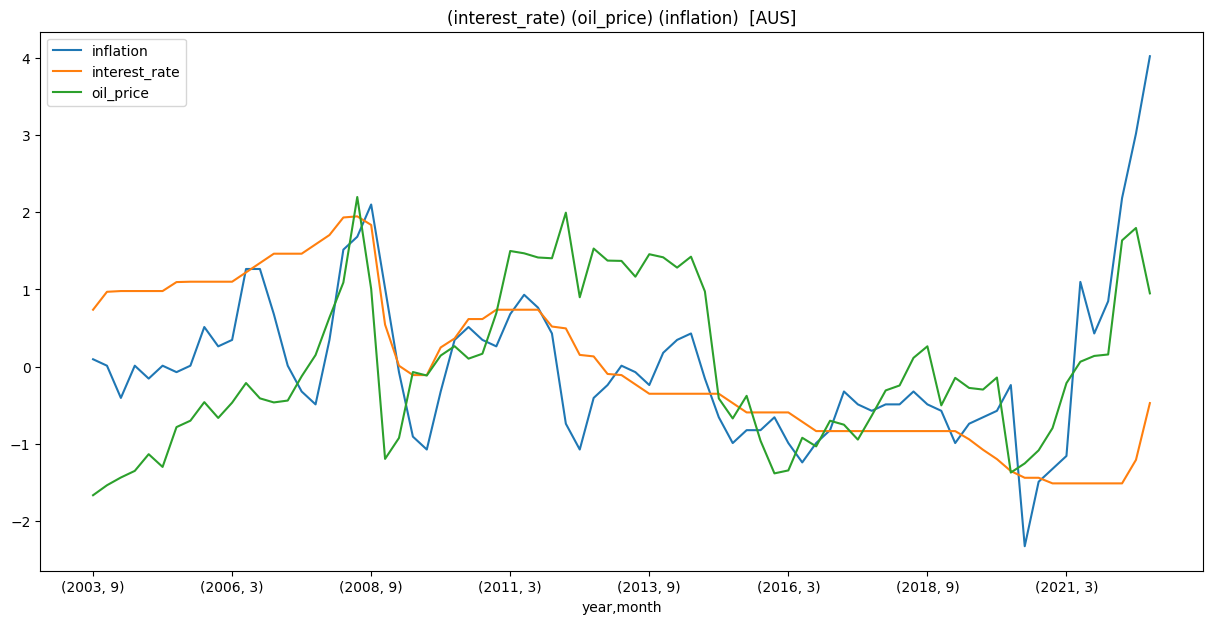

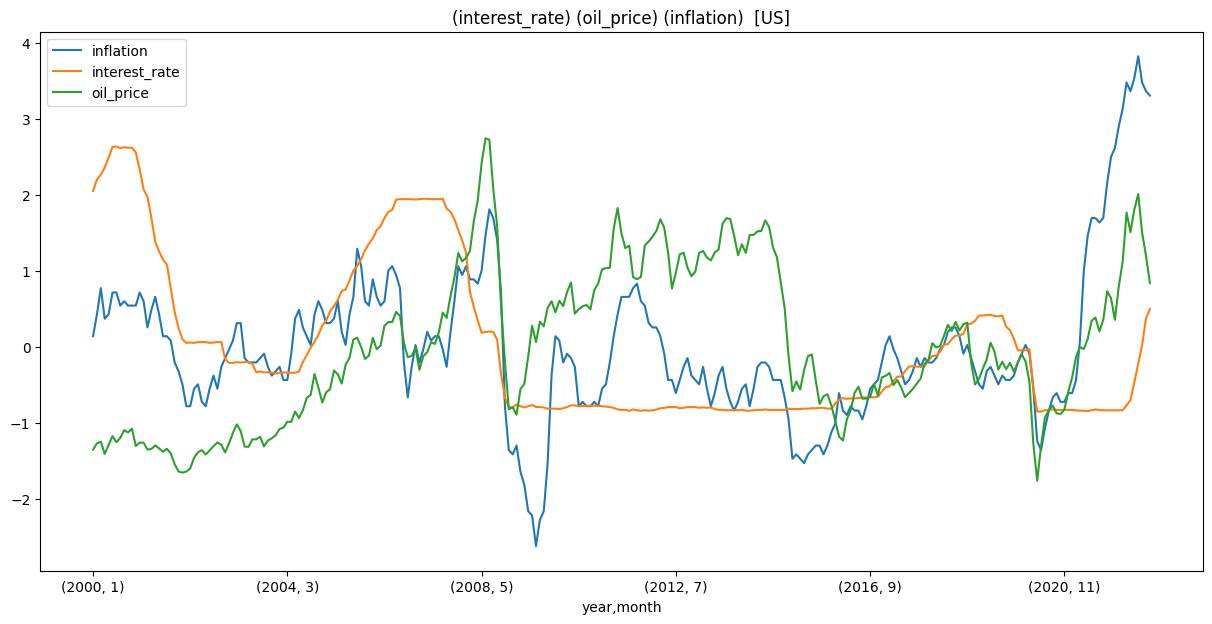

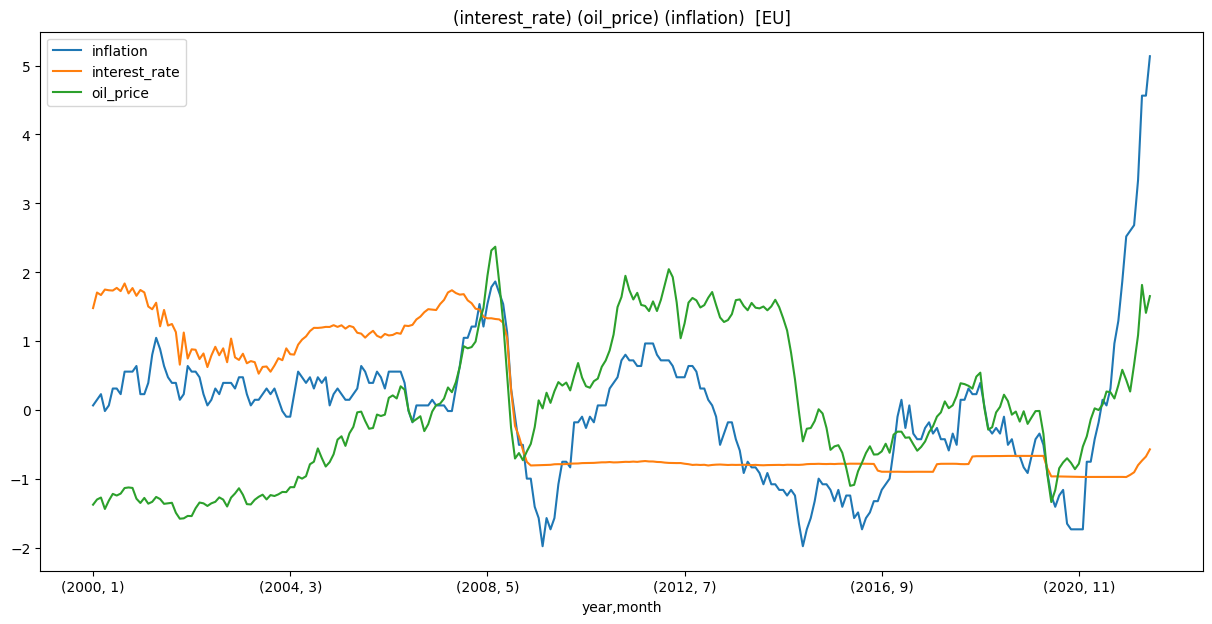

In [26]:
current_plt_figsize = plt.rcParams['figure.figsize']

def scaled_features_plot(df_for_plot,col_names,country_name):
    scaled_features = df_for_plot.copy()
    features = scaled_features[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)

    scaled_features[col_names] = features

    plt.rcParams['figure.figsize'] = [15,7]
    pd.pivot_table(scaled_features.reset_index(),           
                   index=['year','month'], values=col_names
              ).plot(subplots=False,title=f'({") (".join(col_names)})  [{country_name}]')
    
    #if(isinstance(feature_x, list) == False):
    #    x = scaled_features[[feature_x]]    
    #else:
    #    x = scaled_features[feature_x]
    #y = scaled_features[[feature_y]]
    #print(sm.OLS(y, sm.add_constant(x)).fit().summary())
    #plt.show()


    
scaled_features_plot(df_au,features_without_lag,'AUS')
scaled_features_plot(df_us,features_without_lag,'US')
scaled_features_plot(df_eu,features_without_lag,'EU')

plt.rcParams['figure.figsize'] = current_plt_figsize

In [19]:
##################################__CORELATION__################################################

In [20]:
method='pearson'
min_periods=1




================================CORRELATION====================================
================================COUNTRY [AUD]===================================


,interest_rate,year,month,oil_price,oil_price_lag_1m,oil_price_lag_2m,oil_price_lag_3m,oil_price_lag_4m,oil_price_lag_5m,oil_price_lag_6m,inflation,inflation_lag_6m
interest_rate,1.000000,-0.914460,0.013664,0.105508,0.107419,0.116739,0.088823,0.075576,0.066932,0.037445,0.330179,0.482129
year,-0.914460,1.000000,-0.069847,0.123056,0.121642,0.110068,0.129388,0.126169,0.113108,0.124115,-0.121474,-0.516487
month,0.013664,-0.069847,1.000000,-0.084738,-0.028674,0.032761,0.056021,0.056137,0.043212,0.018723,-0.002371,0.016656
oil_price,0.105508,0.123056,-0.084738,1.000000,0.969594,0.909136,0.859325,0.817503,0.754815,0.704703,0.464497,0.120681
oil_price_lag_1m,0.107419,0.121642,-0.028674,0.969594,1.000000,0.972735,0.935003,0.884349,0.816673,0.772312,0.476086,0.130174
oil_price_lag_2m,0.116739,0.110068,0.032761,0.909136,0.972735,1.000000,0.974986,0.924447,0.853568,0.805536,0.495480,0.107299
oil_price_lag_3m,0.088823,0.129388,0.056021,0.859325,0.935003,0.974986,1.000000,0.970637,0.912144,0.864648,0.483832,0.118969
oil_price_lag_4m,0.075576,0.126169,0.056137,0.817503,0.884349,0.924447,0.970637,1.000000,0.973424,0.937162,0.422507,0.106293
oil_price_lag_5m,0.066932,0.113108,0.043212,0.754815,0.816673,0.853568,0.912144,0.973424,1.000000,0.975550,0.375262,0.099708
oil_price_lag_6m,0.037445,0.124115,0.018723,0.704703,0.772312,0.805536,0.864648,0.937162,0.975550,1.000000,0.319285,0.131723


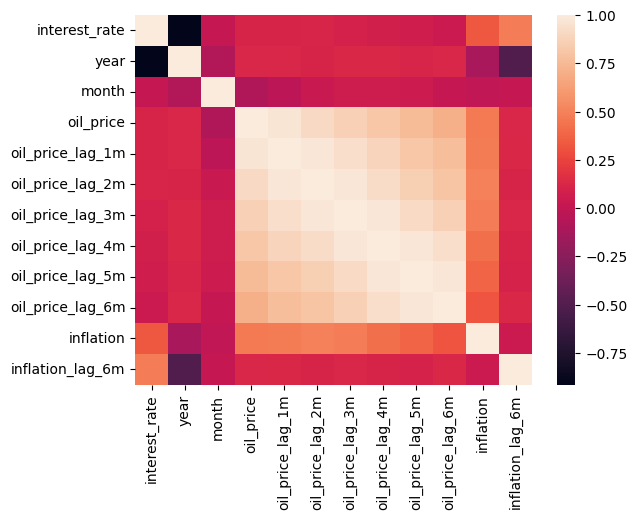




================================CORRELATION====================================
================================COUNTRY [USA]===================================


,interest_rate,year,month,oil_price,oil_price_lag_1m,oil_price_lag_2m,oil_price_lag_3m,oil_price_lag_4m,oil_price_lag_5m,oil_price_lag_6m,inflation,inflation_lag_6m
interest_rate,1.000000,-0.557329,-0.015702,-0.280337,-0.284289,-0.292999,-0.306845,-0.324433,-0.341563,-0.357302,0.282216,0.360040
year,-0.557329,1.000000,-0.024359,0.356424,0.357103,0.356990,0.356783,0.354833,0.354310,0.355685,0.068241,-0.234462
month,-0.015702,-0.024359,1.000000,0.008380,0.052910,0.076750,0.077992,0.065770,0.045965,0.012897,-0.012769,0.005673
oil_price,-0.280337,0.356424,0.008380,1.000000,0.975246,0.933255,0.885728,0.840862,0.797769,0.758403,0.328672,0.022604
oil_price_lag_1m,-0.284289,0.357103,0.052910,0.975246,1.000000,0.975569,0.934216,0.888180,0.842739,0.799118,0.320263,0.037333
oil_price_lag_2m,-0.292999,0.356990,0.076750,0.933255,0.975569,1.000000,0.975757,0.935302,0.888807,0.843082,0.283347,0.043857
oil_price_lag_3m,-0.306845,0.356783,0.077992,0.885728,0.934216,0.975757,1.000000,0.976151,0.935360,0.888771,0.232271,0.044206
oil_price_lag_4m,-0.324433,0.354833,0.065770,0.840862,0.888180,0.935302,0.976151,1.000000,0.976054,0.935475,0.167461,0.043137
oil_price_lag_5m,-0.341563,0.354310,0.045965,0.797769,0.842739,0.888807,0.935360,0.976054,1.000000,0.976149,0.102038,0.045107
oil_price_lag_6m,-0.357302,0.355685,0.012897,0.758403,0.799118,0.843082,0.888771,0.935475,0.976149,1.000000,0.038269,0.051952


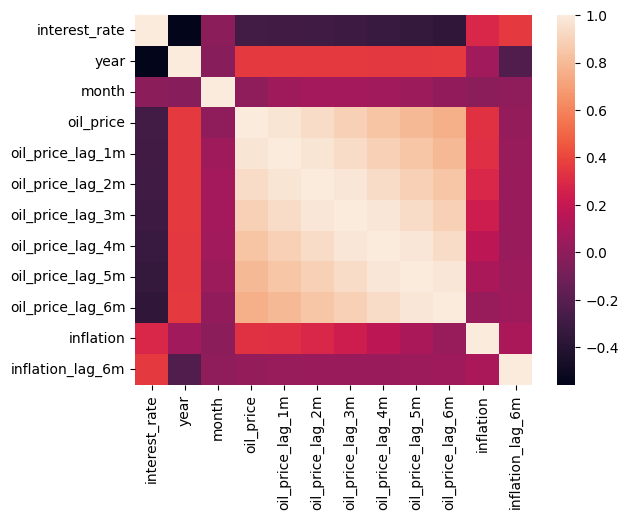




================================CORRELATION====================================
================================COUNTRY [EU]===================================


,interest_rate,year,month,oil_price,oil_price_lag_1m,oil_price_lag_2m,oil_price_lag_3m,oil_price_lag_4m,oil_price_lag_5m,oil_price_lag_6m,inflation,inflation_lag_6m
interest_rate,1.000000,-0.835791,-0.006033,-0.389739,-0.391861,-0.396607,-0.401270,-0.404273,-0.406880,-0.409004,0.366693,0.361647
year,-0.835791,1.000000,-0.032799,0.389648,0.392627,0.393412,0.392344,0.388894,0.385877,0.383224,-0.201564,-0.473974
month,-0.006033,-0.032799,1.000000,0.001814,-0.030169,-0.044493,-0.038085,-0.028221,-0.009253,0.015946,-0.035893,0.000828
oil_price,-0.389739,0.389648,0.001814,1.000000,0.981744,0.948088,0.909888,0.872584,0.837954,0.805622,0.248584,0.070517
oil_price_lag_1m,-0.391861,0.392627,-0.030169,0.981744,1.000000,0.981489,0.947451,0.908312,0.871303,0.836944,0.254130,0.062555
oil_price_lag_2m,-0.396607,0.393412,-0.044493,0.948088,0.981489,1.000000,0.981390,0.946888,0.907804,0.870879,0.245093,0.055399
oil_price_lag_3m,-0.401270,0.392344,-0.038085,0.909888,0.947451,0.981390,1.000000,0.981231,0.946668,0.907562,0.232209,0.045218
oil_price_lag_4m,-0.404273,0.388894,-0.028221,0.872584,0.908312,0.946888,0.981231,1.000000,0.981158,0.946501,0.215997,0.034335
oil_price_lag_5m,-0.406880,0.385877,-0.009253,0.837954,0.871303,0.907804,0.946668,0.981158,1.000000,0.981107,0.202051,0.019821
oil_price_lag_6m,-0.409004,0.383224,0.015946,0.805622,0.836944,0.870879,0.907562,0.946501,0.981107,1.000000,0.189547,0.006843


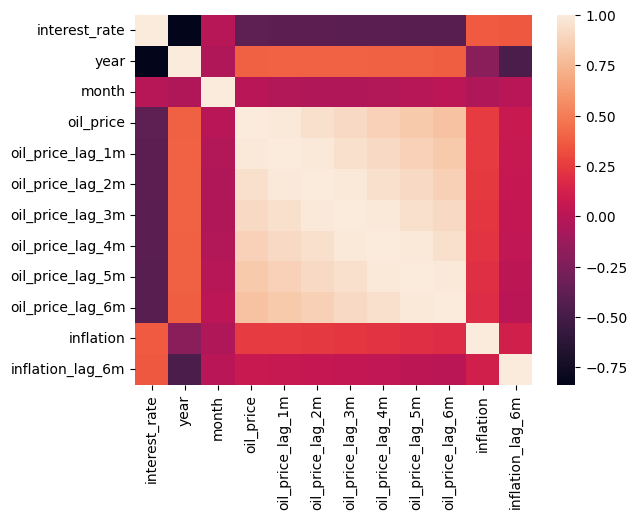

In [21]:
def correlation(df_country,country_name):
    print()
    print()
    print()
    print(f'===============================================================================')
    print(f'================================CORRELATION====================================')
    print(f'===============================================================================')
    print(f'================================COUNTRY [{country_name}]===================================')    
    print(f'===============================================================================')
    df_corr = df_country.corr(numeric_only=True,method=method, min_periods=min_periods)
    display(HTML(df_corr.to_html()))   
    sns.heatmap(df_corr)
    #sns.pairplot(df_country)
    plt.show()
    

correlation(df_au,'AUD')
correlation(df_us,'USA')
correlation(df_eu,'EU')

In [22]:
##################################__Linear Regression__################################################




================================COUNTRY AUS====================================
============================oil_price vs inflation==========================
                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     20.63
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           2.09e-05
Time:                        23:00:48   Log-Likelihood:                -113.70
No. Observations:                  77   AIC:                             231.4
Df Residuals:                      75   BIC:                             236.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

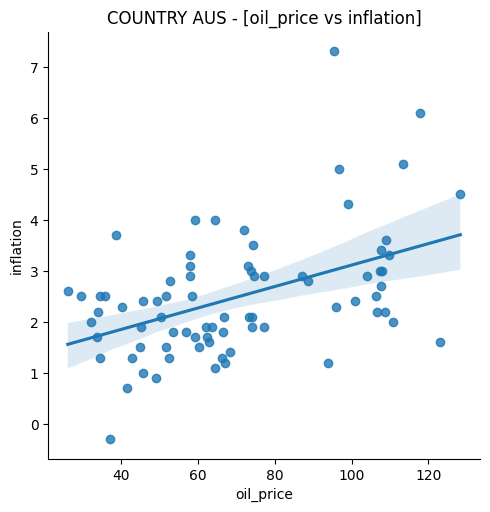




================================COUNTRY USA====================================
============================oil_price vs inflation==========================
                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     32.82
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           2.68e-08
Time:                        23:00:49   Log-Likelihood:                -522.63
No. Observations:                 273   AIC:                             1049.
Df Residuals:                     271   BIC:                             1056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

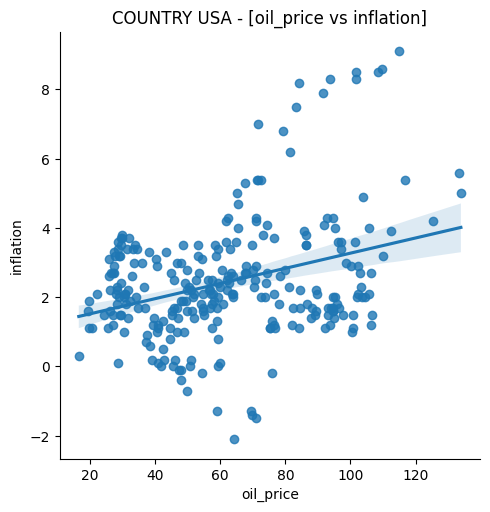




================================COUNTRY EU====================================
============================oil_price vs inflation==========================
                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     17.59
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           3.74e-05
Time:                        23:00:49   Log-Likelihood:                -427.59
No. Observations:                 269   AIC:                             859.2
Df Residuals:                     267   BIC:                             866.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>

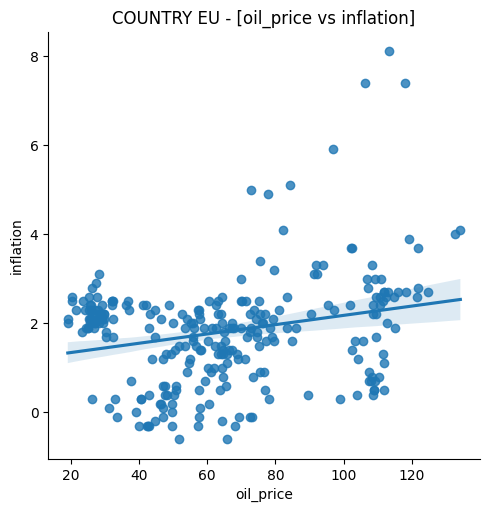




================================COUNTRY AUS====================================
============================['oil_price_lag_1m', 'inflation'] vs interest_rate==========================
                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     4.677
Date:                Wed, 09 Nov 2022   Prob (F-statistic):             0.0122
Time:                        23:00:49   Log-Likelihood:                -160.52
No. Observations:                  77   AIC:                             327.0
Df Residuals:                      74   BIC:                             334.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      

In [31]:
lr_features = [#('oil_price','cpi-index'), ('interest_rate','cpi-index'), ('inflation','cpi-index'),
   #('interest_rate','inflation'),('interest_rate_short_term','inflation'),('interest_rate_long_term','inflation'),
   ##(X,Y) -> X [Independt var] , Y [Depend Var)
   #('oil_price', 'inflation'),
    ('oil_price', 'inflation'),
    (['oil_price_lag_1m','inflation'], 'interest_rate'),           
    (['oil_price_lag_2m','inflation'], 'interest_rate'),
    
               
   #('interest_rate', 'inflation'),

   #('interest_rate','inflation_lag_2m'),('interest_rate_short_term','inflation_lag_2m'),('interest_rate_long_term','inflation_lag_2m'),
   #(['oil_price','interest_rate'],'cpi-index'),
   #(['oil_price','interest_rate'],'inflation')
              ]
   
def linear_regresion_plot(df_feature,feature_x,feature_y,country_name):   
    if(isinstance(feature_x, list) == False):
        x = df_feature[[feature_x]]    
    else:
        x = df_feature[feature_x]
    y = df_feature[[feature_y]]
    print()
    print()
    print()
    print(f'===============================================================================')
    print(f'================================COUNTRY {country_name}====================================')    
    print(f'============================{feature_x} vs {feature_y}==========================') 
    print(f'===============================================================================')
    print(sm.OLS(y, sm.add_constant(x)).fit().summary())
    
    if(isinstance(feature_x, list) == False):
        sns.lmplot(x=feature_x, y=feature_y, data=df_feature)
        plt.title(f'COUNTRY {country_name} - [{feature_x} vs {feature_y}]')
        plt.show()
    
for feature_x, feature_y in lr_features:  
    linear_regresion_plot(df_au,feature_x,feature_y,'AUS')
    linear_regresion_plot(df_us,feature_x,feature_y,'USA')
    linear_regresion_plot(df_eu,feature_x,feature_y,'EU')

In [24]:
##################################__NORMAL DISTRIBUSION__################################################

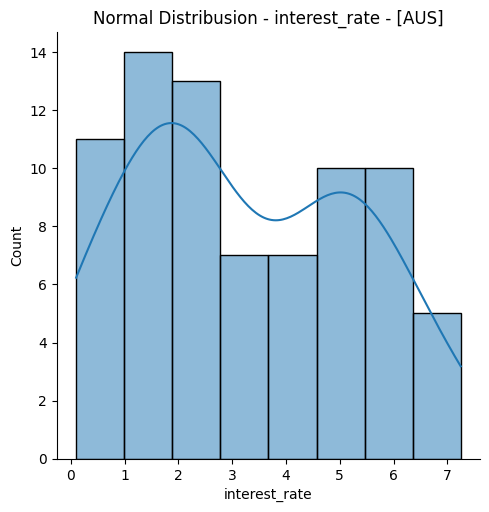

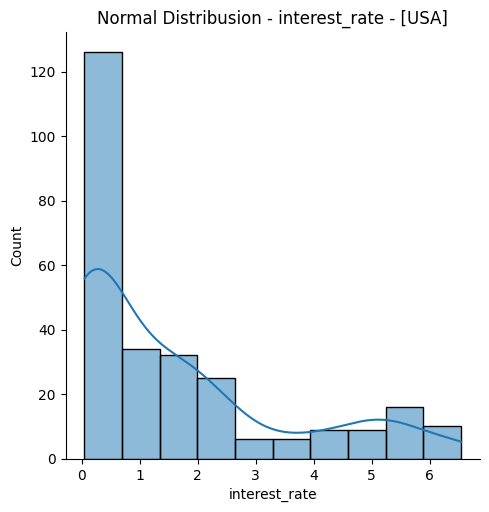

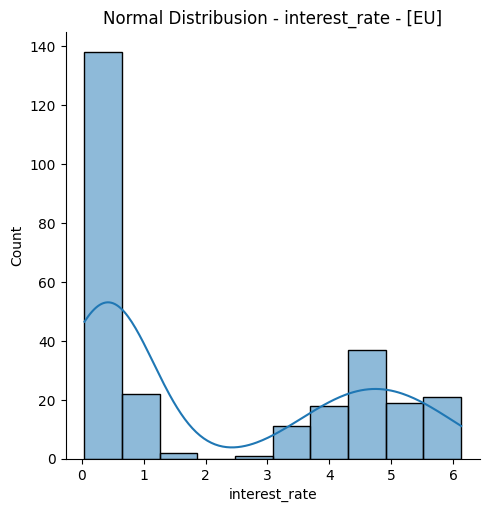

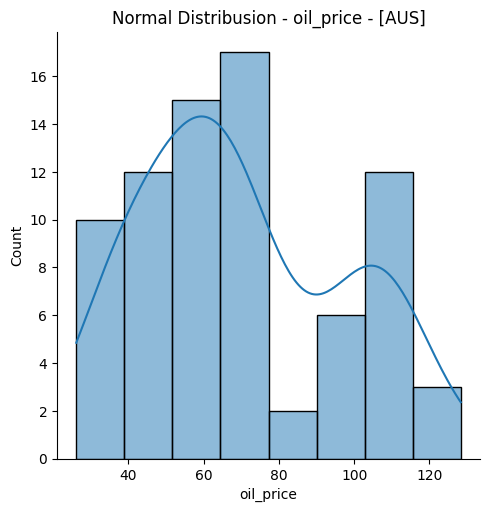

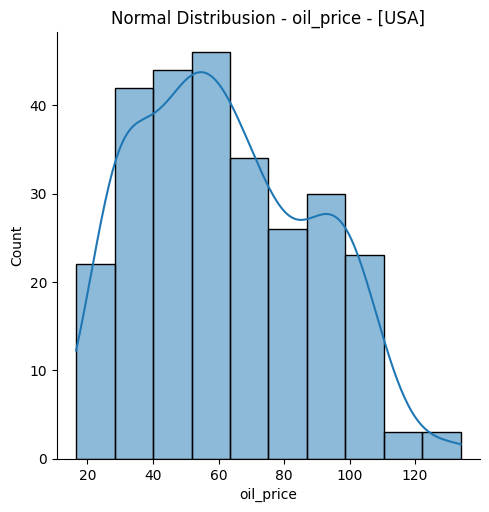

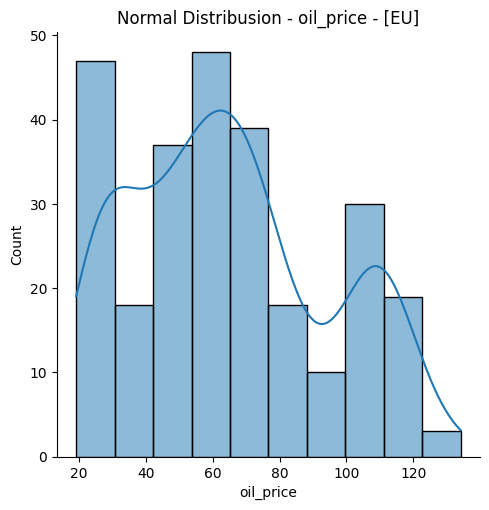

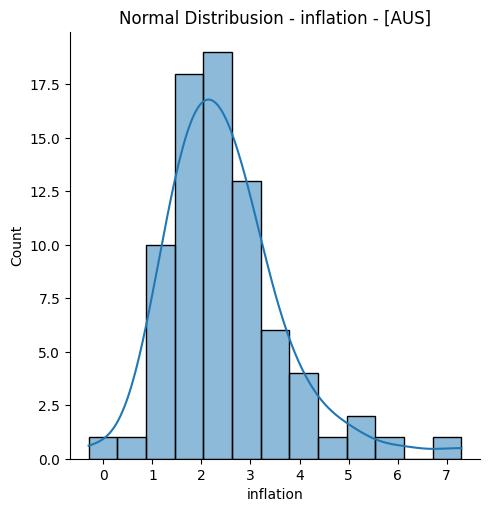

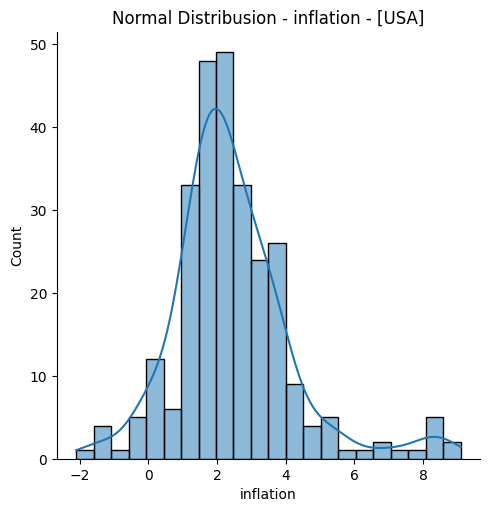

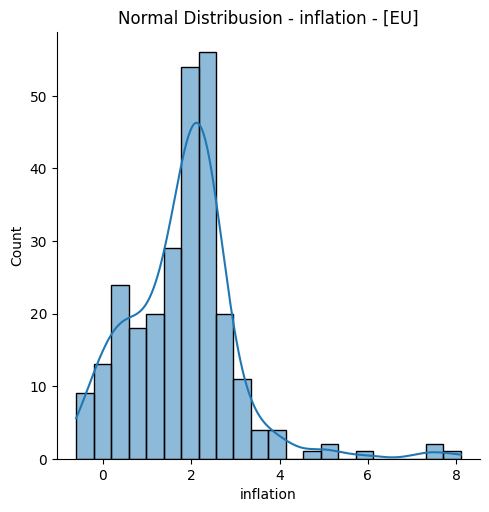

In [28]:
for index, feature in enumerate(features_without_lag):
    sns.displot(df_au[feature], kde=True)
    plt.title(f'Normal Distribusion - {feature} - [AUS]')

    sns.displot(df_us[feature], kde=True)
    plt.title(f'Normal Distribusion - {feature} - [USA]')
    
    sns.displot(df_eu[feature], kde=True)
    plt.title(f'Normal Distribusion - {feature} - [EU]')